In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv("Assignment Data/fake reviews dataset.csv")

# Data Exploration

In [4]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [7]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [9]:
df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [10]:
df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [12]:
df.rename(columns = { 'text_' : 'text'}, inplace = True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [13]:
replace_map = {
    'Home_and_Kitchen_5': 'Home_and_Kitchen',
    'Kindle_Store_5': 'Kindle_Store',
    'Books_5': 'Books',
    'Pet_Supplies_5': 'Pet_Supplies',
    'Electronics_5': 'Electronics',
    'Sports_and_Outdoors_5': 'Sports_and_Outdoors',
    'Tools_and_Home_Improvement_5': 'Tools_and_Home_Improvement',
    'Clothing_Shoes_and_Jewelry_5': 'Clothing_Shoes_and_Jewelry',
    'Toys_and_Games_5': 'Toys_and_Games',
    'Movies_and_TV_5': 'Movies_and_TV'
}

for old_value, new_value in replace_map.items():
    df = df.replace(old_value, new_value, regex=True)

# Data Cleaning

In [14]:
def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [15]:
df['text'][0], clean_text(df['text'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [22]:
df['text'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text, dtype: object

In [16]:
df.shape

(40432, 4)

In [17]:
df['text'] = df['text'].astype(str)

In [18]:
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

In [19]:
preprocess(df['text'][4])

'Very nice set Good quality We set two months'

In [20]:
df['text'][:10000] = df['text'][:10000].apply(preprocess)

In [21]:
df['text'][10001:20000] = df['text'][10001:20000].apply(preprocess)

In [22]:
df['text'][20001:30000] = df['text'][20001:30000].apply(preprocess)

In [23]:
df['text'][30001:40000] = df['text'][30001:40000].apply(preprocess)

In [24]:
df['text'][40001:40432] = df['text'][40001:40432].apply(preprocess) 

In [25]:
df['text'] = df['text'].str.lower()

In [26]:
df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdy comfortable i love very ...
1,Home_and_Kitchen,5.0,CG,love great upgrade original i 've mine couple ...
2,Home_and_Kitchen,5.0,CG,this pillow saved back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,missing information use great product price i
4,Home_and_Kitchen,5.0,CG,very nice set good quality we set two months


In [27]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text'] = df['text'].apply(lambda x: stem_words(x))

In [28]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text"] = df["text"].apply(lambda text: lemmatize_words(text))

In [29]:
df['text'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text, dtype: object

In [30]:
df.to_csv('preprocessed.csv')

# New Section for Model Training starts here

run the data frame from here

In [31]:
new_df = pd.read_csv('preprocessed.csv')

In [32]:
new_df.head()

,Unnamed: 0,category,rating,label,text
0,0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [33]:
new_df.drop('Unnamed: 0',axis=1,inplace=True)

In [34]:
new_df.head()

,category,rating,label,text
0,Home_and_Kitchen,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen,5.0,CG,veri nice set good qualiti we set two month


In [35]:
new_df.dropna(inplace=True)
new_df['length'] = df['text'].apply(len)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text      40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


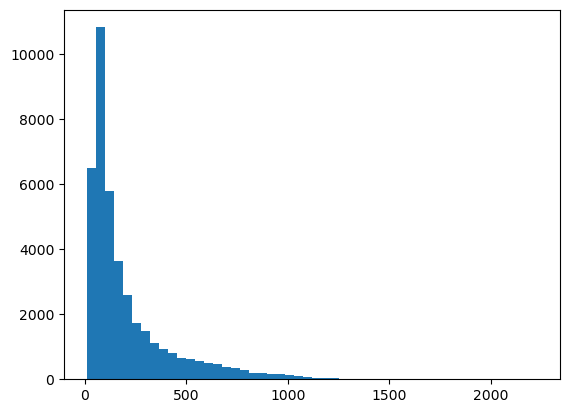

In [36]:
plt.hist(new_df['length'],bins=50)
plt.show()

In [37]:
new_df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                 
             mean         std   min   25%    50%    75%     max  
label                                                            
CG     173.639030  173.955252  13.0  57.0   99.0  217.0  1300.0  
OR     237.892758  252.920635   8.0  74.0  134.0  296.0  2232.0

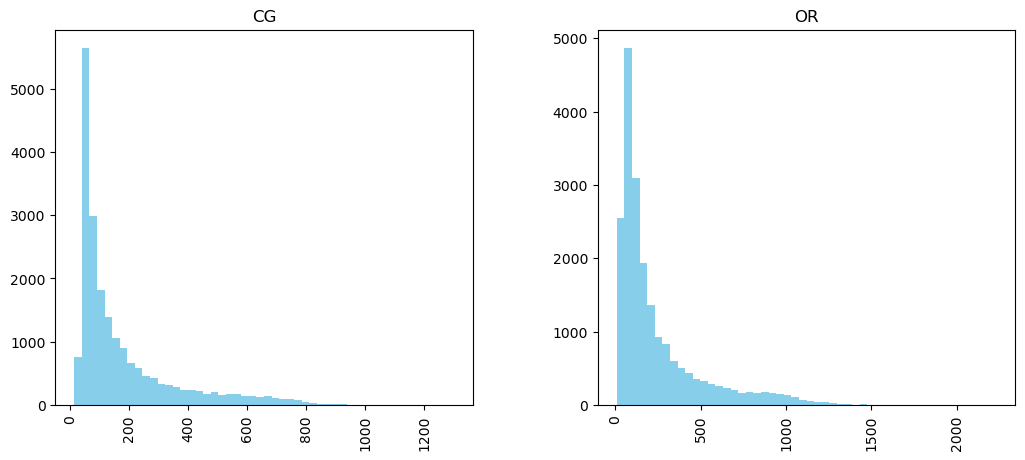

In [38]:
new_df.hist(column='length',by='label',bins=50,color='skyblue',figsize=(12,5))
plt.show()

In [39]:
new_df[new_df['label']=='OR'][['text','length']].sort_values(by='length',ascending=False).head().iloc[0].text

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [40]:
new_df.length.describe()

count    40431.000000
mean       205.766689
std        219.422084
min          8.000000
25%         64.000000
50%        116.000000
75%        253.000000
max       2232.000000
Name: length, dtype: float64

In [41]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [42]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000024D791219E0>)

In [44]:
bow_transformer.fit(new_df['text'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34450


In [47]:
review4 = new_df['text'][3]
review4

'miss inform use great product price i'

In [48]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1
(1, 34450)


In [52]:
print(bow_transformer.get_feature_names_out()[13598])
print(bow_transformer.get_feature_names_out()[15840])
print(bow_transformer.get_feature_names_out()[19848])
print(bow_transformer.get_feature_names_out()[23847])
print(bow_transformer.get_feature_names_out()[23977])
print(bow_transformer.get_feature_names_out()[32182])

great
inform
miss
price
product
use


In [53]:
# converts the raw text data into numerical data
bow_reviews = bow_transformer.transform(new_df['text'])

In [54]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire reviews corpus: (40431, 34450)
Amount of non zero values in the bag of words model: 1013898


In [55]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [56]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13598)	1
  (0, 15840)	1
  (0, 19848)	1
  (0, 23847)	1
  (0, 23977)	1
  (0, 32182)	1


In [57]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.91422964906803
2.821684385176731


In [58]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 34450)
No. of Dimensions: 2


Model Building